In [47]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [48]:
df = pd.read_csv("../data/datasets/miami/miami.csv")
df.head(5)

,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,h_angle,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,wind_dir,wind_gust_spd,wind_spd,weather_description
0,23.5,252.3,100,2014-01-01:00,18.1,0,0,-17.5,0,NaN,...,23.2,2013-12-31T19:00:00,2014-01-01T00:00:00,1388534400,0.0,NaN,60,9.3,7.20,Overcast clouds
1,23.6,257.3,98,2014-01-01:01,17.8,0,0,-30.5,0,NaN,...,23.4,2013-12-31T20:00:00,2014-01-01T01:00:00,1388538000,0.0,NaN,50,9.3,5.70,Overcast clouds
2,23.9,262.0,100,2014-01-01:02,18.0,0,0,-43.8,0,NaN,...,23.6,2013-12-31T21:00:00,2014-01-01T02:00:00,1388541600,0.0,NaN,60,8.2,5.70,Overcast clouds
3,23.7,266.9,100,2014-01-01:03,18.5,0,0,-57.3,0,NaN,...,23.4,2013-12-31T22:00:00,2014-01-01T03:00:00,1388545200,0.0,NaN,50,8.8,5.09,Overcast clouds
4,23.9,273.6,100,2014-01-01:04,18.7,0,0,-70.8,0,NaN,...,23.6,2013-12-31T23:00:00,2014-01-01T04:00:00,1388548800,0.0,NaN,60,9.3,6.20,Overcast clouds


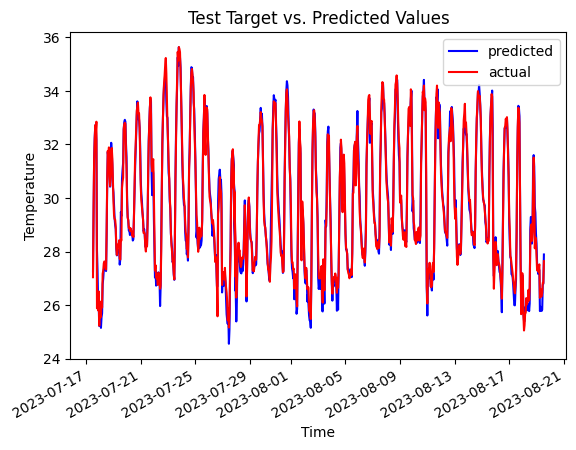

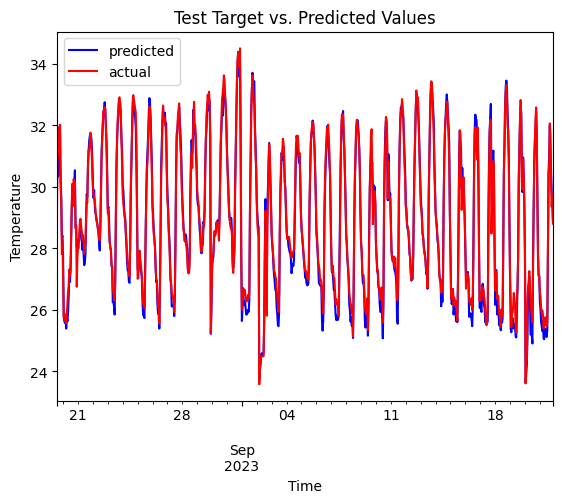

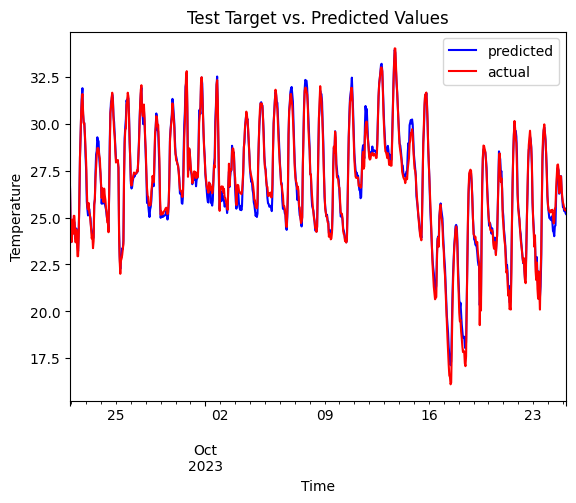

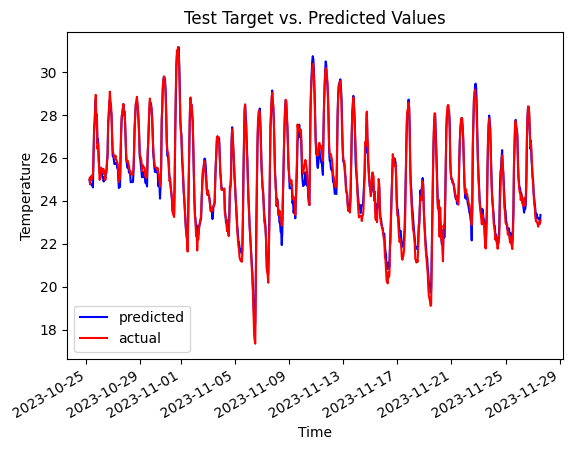

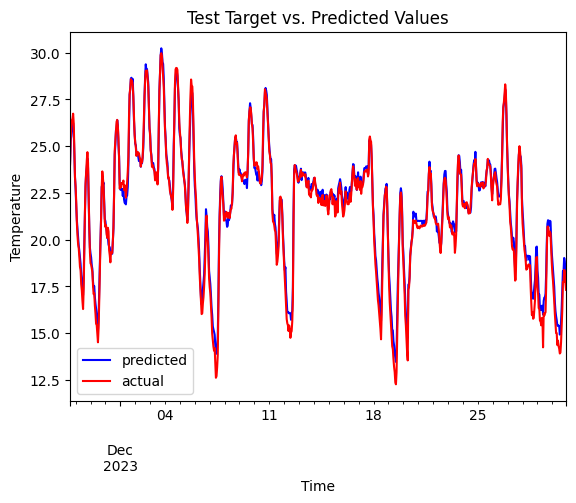

Average MSE: 0.1253335602439124


In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from math import floor


X = df[['feels_like', 'pressure', 'humidity', 'temp_min',	'temp_max', 'wind_speed']]
y = df['temp']

X.count()
cld = linear_model.ARDRegression()

scores = []
tscv = TimeSeriesSplit(test_size=800)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    cld.fit(X_train, y_train)

    y_pred = cld.predict(X_test)
    predictions = pd.DataFrame({"index": df.iloc[test_index].index,"actual": y.iloc[test_index], "predicted": y_pred})
    predictions.plot(x="index", y=['predicted', 'actual'], style=['b-', 'r-'])
    plt.title('Test Target vs. Predicted Values')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.show()
    
    scores.append(mean_squared_error(y_test, y_pred))

avg_mse = np.mean(scores)
print("Average MSE:", avg_mse)



In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from math import floor

# df = df.reset_index(names="timestamp")
X = pd.DataFrame({"year": df["timestamp"].dt.year, 
                  "month": df["timestamp"].dt.month, 
                  "day": df["timestamp"].dt.day,
                   "hour": df["timestamp"].dt.hour
                   "temp": df["temp"],
                   "feels_like": df["feels_like"],
                    "pressure": df["pressure"],
                    "humidity": df[]	temp_min	temp_max	wind_speed	wind_deg	clouds_coverage})
y = df['temp']
search_params = {
    'alpha_1':[0.01, 0.1, 1.0],
    'alpha_2': [0.01, 0.1, 1.0],
    'lambda_1': [0.01, 0.1, 1.0],
    'n_iter': [100, 200, 300]
}


cld = linear_model.ARDRegression()

scores = []
tscv = TimeSeriesSplit(test_size=800)

gs = GridSearchCV(cld, param_grid=search_params ,cv=tscv, scoring='neg_mean_squared_error')
gs.fit(X, y)
print("Best estimator", gs.best_estimator_)
print("Best params", gs.best_params_)
print("Best score", gs.best_score_)

# scores = []
# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     cld.fit(X_train, y_train)

#     y_pred = cld.predict(X_test)
#     predictions = pd.DataFrame({"index": df.iloc[test_index]["timestamp"],"actual": y.iloc[test_index], "predicted": y_pred})
#     predictions.plot(x="index", y=['predicted', 'actual'], style=['b-', 'r-'])
#     plt.title('Test Target vs. Predicted Values')
#     plt.xlabel('Time')
#     plt.ylabel('Temperature')
#     plt.show()
    
#     scores.append(mean_squared_error(y_test, y_pred))

# avg_mse = np.mean(scores)
# print("Average MSE:", avg_mse)



SyntaxError: invalid syntax. Perhaps you forgot a comma? (4095260464.py, line 10)

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from math import floor

# df = df.reset_index(names="timestamp")
X = pd.DataFrame({"year": df["timestamp"].dt.year, 
                  "month": df["timestamp"].dt.month, 
                  "day": df["timestamp"].dt.day,
                   "hour": df["timestamp"].dt.hour})
y = df['wind_speed']

search_params = {
    'alpha_1':[0.01, 0.1, 1.0],
    'alpha_2': [0.01, 0.1, 1.0],
    'lambda_1': [0.01, 0.1, 1.0],
    'n_iter': [100, 200, 300]
}


cld = linear_model.ARDRegression()

scores = []
tscv = TimeSeriesSplit(test_size=800)

gs = GridSearchCV(cld, param_grid=search_params ,cv=tscv, scoring='neg_mean_squared_error')
gs.fit(X, y)
print("Best estimator", gs.best_estimator_)
print("Best params", gs.best_params_)
print("Best score", gs.best_score_)

# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     cld.fit(X_train, y_train)

#     y_pred = cld.predict(X_test)
#     predictions = pd.DataFrame({"index": df.iloc[test_index]["timestamp"],"actual": y.iloc[test_index], "predicted": y_pred})
#     predictions.plot(x="index", y=['predicted', 'actual'], style=['b-', 'r-'])
#     plt.title('Test Target vs. Predicted Values')
#     plt.xlabel('Time')
#     plt.ylabel('Temperature')
#     plt.show()
    
#     scores.append(mean_squared_error(y_test, y_pred))

# avg_mse = np.mean(scores)
# print("Average MSE:", avg_mse)



/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: Futu

Best estimator ARDRegression(alpha_1=0.01, alpha_2=1.0, lambda_1=1.0, n_iter=100)
Best params {'alpha_1': 0.01, 'alpha_2': 1.0, 'lambda_1': 1.0, 'n_iter': 100}
Best score -58.262390541111


/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


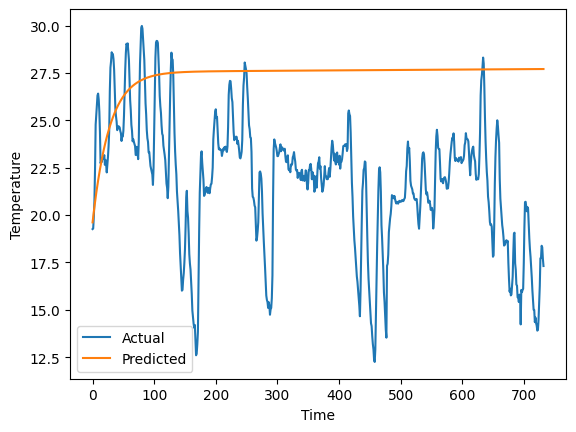

In [45]:
from statsmodels.tsa.vector_ar.var_model import VAR
from time import mktime


X = pd.DataFrame({ "timestamp": df["timestamp"],
                   "temp": df["temp"]})
X = X[["timestamp",
                   "temp"
                   ]].to_numpy()

train_size = int(0.9 * len(X))
train, test = X[:train_size], X[train_size:]

model = VAR(train)
var_results = model.fit()
forecast = var_results.forecast(train, steps=len(test))

real_temp = test[:, 1]
forecast_temp = forecast[:, 1]


 
plt.plot(real_temp, label="Actual")
plt.plot(forecast_temp, label="Predicted")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [49]:

import tensorflow as tf
import pandas as pd
import numpy as np

2024-03-04 22:10:31.935463: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 22:10:32.001734: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 22:10:32.307279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 22:10:32.307387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 22:10:32.362578: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [75]:
df = pd.read_csv("../data/datasets/miami/miami.csv")
df.rename(columns={"ts": "timestamp"}, inplace=True)
df.rename(columns={"app_temp": "feels_like",
                 "clouds": "clouds_percentage", "elev_angle": "sun_horison_angle",
                 "precip": "precipitation", "pres": "pressure",
                 "rh": "humidity", "snow": "snow_level",
                 "vis": "visibility", "wind_spd": "wind_speed",
                 "wind_dir": "wind_direction"}, inplace=True)
df = df[['timestamp', 'temp', 'feels_like', 'clouds_percentage', 'sun_horison_angle',
         'precipitation', 'pressure', 'humidity', 'snow_level', 'visibility',
         'wind_speed', 'wind_direction', 'weather_description']]
df.index = pd.to_datetime(df["timestamp"], unit="s")
df.drop(columns={'timestamp'}, inplace=True)
temp = df['temp']

In [76]:

def df_to_X_y(df, window_size=5):
    np_df = df.to_numpy()
    X = []
    y = []
    for i in range(len(np_df) - window_size):
        row = [[a] for a in np_df[i:i+window_size]]
        X.append(row)
        label = np_df[i+window_size]
        y.append(label)

    return np.array(X), np.array(y)


In [77]:
X, y = df_to_X_y(temp)
X.shape, y.shape

((91406, 5, 1), (91406,))

In [78]:
X_train, y_train = X[:-16000], y[:-16000]
X_val, y_val = X[-16000:-9000], y[-16000:-9000]
X_test, y_test = X[-9000:], y[-9000:]

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
cp1 = ModelCheckpoint('temp/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [81]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
2350/2357 [============================>.] - ETA: 0s - loss: 197.3987 - root_mean_squared_error: 14.0499INFO:tensorflow:Assets written to: temp/assets


INFO:tensorflow:Assets written to: temp/assets


2357/2357 [==============================] - 24s 9ms/step - loss: 196.8972 - root_mean_squared_error: 14.0320 - val_loss: 26.5171 - val_root_mean_squared_error: 5.1495
Epoch 2/10
2354/2357 [============================>.] - ETA: 0s - loss: 3.6565 - root_mean_squared_error: 1.9122INFO:tensorflow:Assets written to: temp/assets


INFO:tensorflow:Assets written to: temp/assets


2357/2357 [==============================] - 20s 9ms/step - loss: 3.6535 - root_mean_squared_error: 1.9114 - val_loss: 2.1917 - val_root_mean_squared_error: 1.4805
Epoch 3/10
2356/2357 [============================>.] - ETA: 0s - loss: 0.4860 - root_mean_squared_error: 0.6972INFO:tensorflow:Assets written to: temp/assets


INFO:tensorflow:Assets written to: temp/assets


2357/2357 [==============================] - 21s 9ms/step - loss: 0.4860 - root_mean_squared_error: 0.6971 - val_loss: 0.8516 - val_root_mean_squared_error: 0.9228
Epoch 4/10
2351/2357 [============================>.] - ETA: 0s - loss: 0.3413 - root_mean_squared_error: 0.5842INFO:tensorflow:Assets written to: temp/assets


INFO:tensorflow:Assets written to: temp/assets


2357/2357 [==============================] - 21s 9ms/step - loss: 0.3412 - root_mean_squared_error: 0.5841 - val_loss: 0.6412 - val_root_mean_squared_error: 0.8007
Epoch 5/10
2353/2357 [============================>.] - ETA: 0s - loss: 0.3312 - root_mean_squared_error: 0.5755INFO:tensorflow:Assets written to: temp/assets


INFO:tensorflow:Assets written to: temp/assets


2357/2357 [==============================] - 21s 9ms/step - loss: 0.3312 - root_mean_squared_error: 0.5755 - val_loss: 0.5469 - val_root_mean_squared_error: 0.7395
Epoch 6/10
2355/2357 [============================>.] - ETA: 0s - loss: 0.3273 - root_mean_squared_error: 0.5721INFO:tensorflow:Assets written to: temp/assets


INFO:tensorflow:Assets written to: temp/assets


2357/2357 [==============================] - 22s 9ms/step - loss: 0.3273 - root_mean_squared_error: 0.5721 - val_loss: 0.5189 - val_root_mean_squared_error: 0.7203
Epoch 7/10
2351/2357 [============================>.] - ETA: 0s - loss: 0.3260 - root_mean_squared_error: 0.5710INFO:tensorflow:Assets written to: temp/assets


INFO:tensorflow:Assets written to: temp/assets


2357/2357 [==============================] - 21s 9ms/step - loss: 0.3259 - root_mean_squared_error: 0.5709 - val_loss: 0.5131 - val_root_mean_squared_error: 0.7163
Epoch 8/10
2350/2357 [============================>.] - ETA: 0s - loss: 0.3248 - root_mean_squared_error: 0.5700INFO:tensorflow:Assets written to: temp/assets


INFO:tensorflow:Assets written to: temp/assets


2357/2357 [==============================] - 21s 9ms/step - loss: 0.3250 - root_mean_squared_error: 0.5701 - val_loss: 0.4830 - val_root_mean_squared_error: 0.6950
Epoch 9/10
2353/2357 [============================>.] - ETA: 0s - loss: 0.3248 - root_mean_squared_error: 0.5699INFO:tensorflow:Assets written to: temp/assets


INFO:tensorflow:Assets written to: temp/assets


2357/2357 [==============================] - 21s 9ms/step - loss: 0.3248 - root_mean_squared_error: 0.5699 - val_loss: 0.4641 - val_root_mean_squared_error: 0.6812
Epoch 10/10
2357/2357 [==============================] - 17s 7ms/step - loss: 0.3231 - root_mean_squared_error: 0.5684 - val_loss: 0.4768 - val_root_mean_squared_error: 0.6905


In [82]:
from tensorflow.keras.models import load_model
model1 = load_model('temp/')

In [83]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

2357/2357 [==============================] - 10s 4ms/step


,Train Predictions,Actuals
0,23.645617,23.9
1,23.995972,24.0
2,24.074661,24.2
3,24.273874,24.2
4,24.256268,24.2
...,...,...
75401,30.556946,30.7
75402,30.540701,29.9
75403,29.925892,29.0
75404,29.096453,28.5


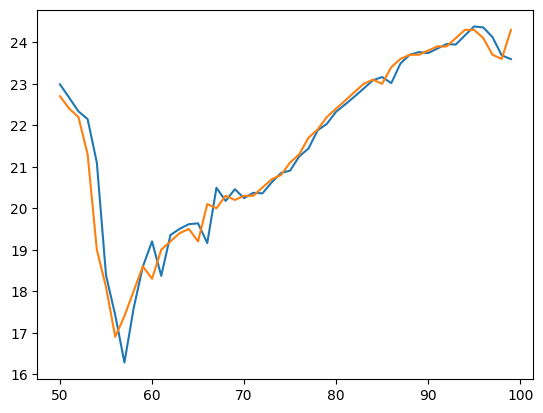

In [84]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [85]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

219/219 [==============================] - 1s 4ms/step


,Val Predictions,Actuals
0,26.400043,25.9
1,26.015360,25.6
2,25.679371,25.8
3,25.885471,26.2
4,26.310406,26.5
...,...,...
6995,25.936152,26.0
6996,26.117483,26.0
6997,26.091898,25.9
6998,25.986757,25.9


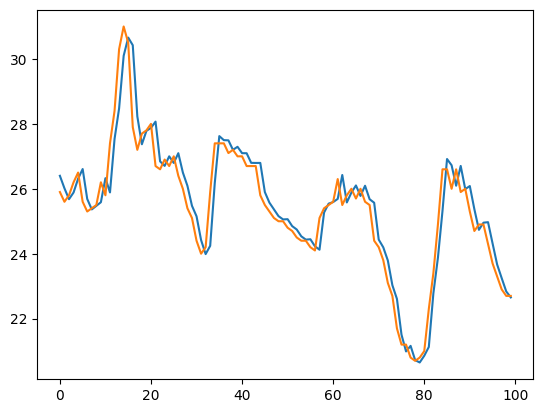

In [86]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [87]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

  1/282 [..............................] - ETA: 12s

282/282 [==============================] - 1s 5ms/step


,Test Predictions,Actuals
0,25.988070,25.8
1,25.883793,26.0
2,26.093653,26.1
3,26.196812,26.1
4,26.192259,25.8
...,...,...
8995,23.308043,23.9
8996,24.085245,24.4
8997,24.565798,24.4
8998,24.477146,24.4


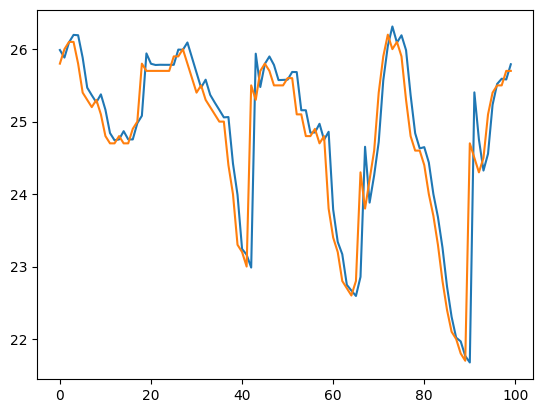

In [88]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [34]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("../data/datasets/miami/miami.csv")
df.rename(columns={"ts": "ds"}, inplace=True)
df.rename(columns={"app_temp": "feels_like",
                 "clouds": "clouds_percentage", "elev_angle": "sun_horison_angle",
                 "precip": "precipitation", "pres": "pressure",
                 "rh": "humidity", "snow": "snow_level",
                 "vis": "visibility", "wind_spd": "wind_speed",
                 "wind_dir": "wind_direction"}, inplace=True)
df = df[['ds', 'temp', 'feels_like', 'clouds_percentage', 'sun_horison_angle',
         'precipitation', 'pressure', 'humidity', 'snow_level', 'visibility',
         'wind_speed', 'wind_direction', 'weather_description']]
df['ds'] = pd.to_datetime(df["ds"], unit="s")
temp = df
temp.rename(columns={"temp": 'y'}, inplace=True)
test_size = 15000
prediction_hours = 240


22:05:12 - cmdstanpy - INFO - Chain [1] start processing
22:07:03 - cmdstanpy - INFO - Chain [1] done processing
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Text(0.5, 0, 'Predicted')

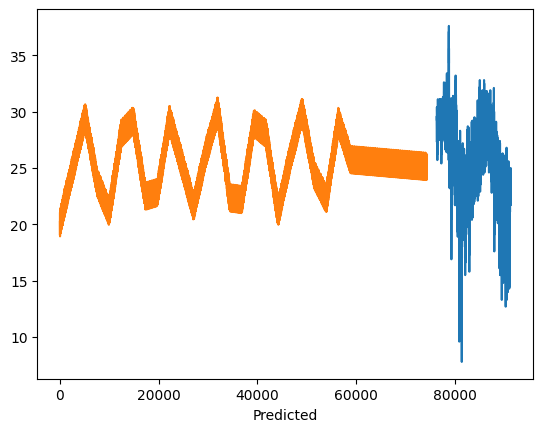

In [45]:
train = temp.iloc[:-test_size]
test = temp.iloc[-test_size:]

model = Prophet(
yearly_seasonality=False,  
weekly_seasonality=False,  
)
model.add_seasonality(name='monthly', period=15, fourier_order=20)  

# model.add_regressor('wind_speed')
# model.add_regressor('temp_min')
# model.add_regressor('temp_max')
# model.add_regressor('pressure') 

model.fit(train)


future = model.make_future_dataframe(periods=prediction_hours, freq='H')
future_len = future.shape[0]  

# future['wind_speed'] = df['wind_speed'].values[:future_len]
# future['temp_max'] = df['temp_max'].values[:future_len]
# future['temp_min'] = df['temp_min'].values[:future_len]
# future['pressure'] = df['pressure'].values[:future_len]

forecast = model.predict(future)
plt.plot(test['y'])
plt.xlabel("Actuals")
plt.plot(forecast['yhat'])
plt.xlabel("Predicted")

# return forecast

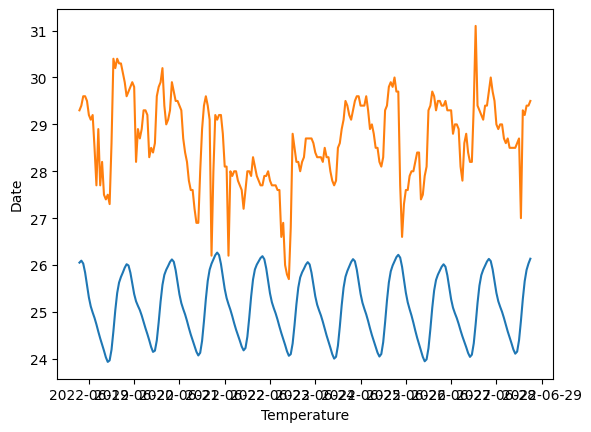

In [46]:
plt.plot(forecast['ds'][-240:], forecast['yhat'][-240:], label='Prediction')
plt.plot(df['ds'][-15000:-14760], df['y'][-15000:-14760], label='Actuals')

plt.ylabel("Date")
plt.xlabel("Temperature")
plt.show()

In [42]:
test.shape, train.shape

((15000, 13), (76411, 13))

In [43]:
test[-240:].head()

,ds,y,feels_like,clouds_percentage,sun_horison_angle,precipitation,pressure,humidity,snow_level,visibility,wind_speed,wind_direction,weather_description
91171,2024-02-23 19:00:00,22.6,22.1,0,48.7,0.0,1003,47,0,16.0,8.80,180,Clear Sky
91172,2024-02-23 20:00:00,22.7,22.2,60,39.8,0.0,1002,44,0,16.0,8.80,180,Broken clouds
91173,2024-02-23 21:00:00,22.8,22.3,25,28.6,0.0,1002,44,0,16.0,8.19,180,Scattered clouds
91174,2024-02-23 22:00:00,22.4,22.0,33,16.3,0.0,1002,50,0,16.0,7.70,190,Scattered clouds
91175,2024-02-23 23:00:00,22.1,21.7,20,3.3,0.0,1002,53,0,16.0,7.20,200,Few clouds
